# 

### 1. Look at the big picture.
### 2. Get the data.
### 3. Discover and visualize the data to gain insights.
### 4. Prepare the data for Machine Learning algorithms.
### 5. Select a model and train it.
### 6. Fine-tune your model.
### 7. Present your solution.
### 8. Launch, monitor, and maintain your system.

In [1]:
# Configure access to Kaggle API credentials to be from .env

import os
from dotenv import load_dotenv

# Load variables from .env file
load_dotenv()

# Set Kaggle API credentials for the session
os.environ['KAGGLE_USERNAME'] = os.getenv('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = os.getenv('KAGGLE_KEY')

In [2]:
# Imports

# Dataset download
import shutil
from pathlib import Path
import zipfile
import kaggle

# Data processing & exploration
# %matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import timeit




In [3]:
# Download the dataset

# Define project paths
PROJECT_DIR = Path(r"C:\Users\ohjin\OneDrive\문서\GitHub\HandsonML")
DATASET_NAME = "ericpierce/austinhousingprices"

# Change to project directory
os.makedirs(PROJECT_DIR, exist_ok=True)
os.chdir(PROJECT_DIR)

def fetch_and_extract_housing_data(project_dir=PROJECT_DIR, dataset_name=DATASET_NAME):
    """
    Downloads dataset from Kaggle using API
    """
    # Check if file already exists from previous download
    csv_files = list(project_dir.glob("*.csv"))
    if any(f.name == "austinHousingData.csv" for f in csv_files):
        print(f"Dataset already exists: {[csv.name for csv in csv_files]}")
        print("Skipping download and extraction.")
        return csv_files[0]

    # Download dataset from Kaggle
    print("Downloading dataset from Kaggle...")
    kaggle.api.dataset_download_files(dataset_name, path=project_dir, unzip=False)
    print("Download complete.")
    print("==================================================")

    # Find the zip file and extract
    zip_files = list(project_dir.glob("*.zip"))
    if not zip_files:
        raise FileNotFoundError("No zip files found in project directory after Kaggle download.")

    for zip_path in zip_files:
        print(f"Extracting {zip_path.name}...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(project_dir)
        # Optional: Clean up zip after extraction
        os.remove(zip_path)
        print(f"Extracted and removed {zip_path.name}")
    print("==================================================")

    # Verify CSV presence
    csv_files = list(project_dir.glob("*.csv"))
    if csv_files:
        print(f"CSV file(s) found: {[csv.name for csv in csv_files]}")
    else:
        raise FileNotFoundError("No CSV files found after extraction.")
    
    return csv_files[0]
    
csv_file = fetch_and_extract_housing_data()

Dataset already exists: ['austinHousingData.csv', 'real_estate_texas_500_2024.csv']
Skipping download and extraction.


In [4]:
# Load data
def load_housing_data(csv_file=csv_file): 
    return pd.read_csv(csv_file)

df = load_housing_data()

In [5]:
print(f'{df.shape[0]} rows x {df.shape[1]} columns')
df.head()

15171 rows x 47 columns


,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [6]:
df.columns

Index(['zpid', 'city', 'streetAddress', 'zipcode', 'description', 'latitude',
       'longitude', 'propertyTaxRate', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView',
       'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'homeImage'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   zpid                        15171 non-null  int64   
 1   city                        15171 non-null  object  
 2   streetAddress               15171 non-null  object  
 3   zipcode                     15171 non-null  int64   
 4   description                 15169 non-null  object  
 5   latitude                    15171 non-null  float64 
 6   longitude                   15171 non-null  float64 
 7   propertyTaxRate             15171 non-null  float64 
 8   garageSpaces                15171 non-null  int64   
 9   hasAssociation              15171 non-null  bool    
 10  hasCooling                  15171 non-null  bool    
 11  hasGarage                   15171 non-null  bool    
 12  hasHeating                  15171 non-null  bool    
 13  hasSpa          

In [40]:
# Find columns with textual data (indicated as 'object' datatype)
object_cols = df.select_dtypes(include='object').columns
object_cols

Index(['city', 'streetAddress', 'description', 'homeType', 'latest_saledate',
       'latestPriceSource', 'homeImage'],
      dtype='object')

#### There are a few ways to address NA or Null values in the data set.

In [7]:
# Option 1 - drop NA values
# df.dropna(subset=["livingAreaSqFt"], inplace=True)

# Option 2 - drop entire column with NA values (not recommended, as it may remove an important feature)
# df.drop("livingAreaSqFt", axis=1)

# Option 3 - replace NA values with median
# median = df["livingAreaSqFt"].median()
# df["livingAreaSqFt"].fillna(median, inplace=True)

# If Option 3 is chosen, median needs to be calculated separately for training set and test set

In [41]:
# SimpleImputer is a convenient way to implement Option 3

from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy="median")

# Create a copy of data set without textual data
df_num = df.drop(object_cols, axis=1)

In [9]:
# Fit the imputer instance to the data
imputer.fit(df_num)

# imputer computes the median of each attribute and stores the result in its statistics_
imputer.statistics_         # Median values of df attributes

array([ 2.94944140e+07,  7.87390000e+04,  3.02844162e+01, -9.77695389e+01,
        1.98000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  1.99300000e+03,  4.05000000e+05,  2.00000000e+00,
        7.00000000e+00,  2.01900000e+03,  2.90000000e+01,  0.00000000e+00,
        3.00000000e+00,  2.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  8.27600000e+03,
        1.97500000e+03,  1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.56666667e+00,  5.77869409e+00,  1.28700000e+03,
        1.50000000e+01,  3.00000000e+00,  3.00000000e+00,  1.00000000e+00])

In [10]:
df_num.median().values      # Same as imputer.statistics_

array([ 2.94944140e+07,  7.87390000e+04,  3.02844162e+01, -9.77695389e+01,
        1.98000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  1.99300000e+03,  4.05000000e+05,  2.00000000e+00,
        7.00000000e+00,  2.01900000e+03,  2.90000000e+01,  0.00000000e+00,
        3.00000000e+00,  2.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  8.27600000e+03,
        1.97500000e+03,  1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.56666667e+00,  5.77869409e+00,  1.28700000e+03,
        1.50000000e+01,  3.00000000e+00,  3.00000000e+00,  1.00000000e+00])

In [11]:
# Use the “trained” imputer to transform the data set by replacing missing values with learned medians
X_imputed = imputer.transform(df_num)       # NumPy array

# Convert to DataFrame
df_tr = pd.DataFrame(X_imputed, columns=df_num.columns, index=df_num.index)

#### For simplicity in this data exploration, Option 1 is pursued by dropping rows with NA values in the column, "livingAreaSqFt."

In [12]:
# Drop rows with NA values
df = df.dropna(subset=["livingAreaSqFt"])

#### For handling textual data, it is possible to convert some of the categorical textual data into numerical values via one-hot encoding.
#### To start, each of the textual data columns can be checked for number of unique values, to check if ordinal encoding would be a viable method.

In [ ]:
# Create a subset of the data containing just the textual data
df_obj = df[object_cols]              # (15171, 7)
df_obj.head(n=3)

,city,streetAddress,description,homeType,latest_saledate,latestPriceSource,homeImage
0,pflugerville,14424 Lake Victor Dr,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",Single Family,2019-09-02,"Coldwell Banker United, Realtors - South Austin",111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,pflugerville,1104 Strickling Dr,Absolutely GORGEOUS 4 Bedroom home with 2 full...,Single Family,2020-10-13,Agent Provided,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,pflugerville,1408 Fort Dessau Rd,Under construction - estimated completion in A...,Single Family,2019-07-31,Agent Provided,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...


In [84]:
# Check number of unique values to consider categorical encoding
df_obj_unique = {}
#df_obj_value_counts = {}
df_obj_cols = []

for col in object_cols:
    #df_cat_value_counts[col] = df_cat[col].value_counts()
    unique_col_length = len(df_obj[col].unique())
    print(f"{unique_col_length} unique values in column '{col}'")

    # Consider anything less than 25 unique values to be worth encoding
    if unique_col_length < 25:
        df_obj_unique[col] = df_obj[col].unique()
        df_obj_cols.append(col)

print('\nUnique values in')
for col in df_obj_unique:
    print(f"{col}: \n{df_obj_unique[col]}")
#print(f"Value counts in each object-type column: {df_obj_value_counts}")

df_cat = df_obj[df_obj_cols]

9 unique values in column 'city'
15164 unique values in column 'streetAddress'
15133 unique values in column 'description'
10 unique values in column 'homeType'
958 unique values in column 'latest_saledate'
225 unique values in column 'latestPriceSource'
15171 unique values in column 'homeImage'

Unique values in
city: 
['pflugerville' 'del valle' 'austin' 'driftwood' 'manor'
 'dripping springs' 'manchaca' 'west lake hills' 'road']
homeType: 
['Single Family' 'Residential' 'Mobile / Manufactured' 'Townhouse' 'Condo'
 'Vacant Land' 'Multiple Occupancy' 'Other' 'Apartment' 'MultiFamily']


#### In this case, it makes sense to choose just 'city' and 'homeType' columns 

In [88]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()                           # OneHotEncoder(sparse_output=False) to create non-sparse matrix
df_cat_1hot = cat_encoder.fit_transform(df_cat)         # 'csr_matrix' object, sparse matrix of dtype 'float64'
df_cat_1hot.toarray()                                   # 106197 stored elements and shape (15171, 46670)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [89]:
cat_encoder.categories_

[array(['austin', 'del valle', 'driftwood', 'dripping springs', 'manchaca',
        'manor', 'pflugerville', 'road', 'west lake hills'], dtype=object),
 array(['Apartment', 'Condo', 'Mobile / Manufactured', 'MultiFamily',
        'Multiple Occupancy', 'Other', 'Residential', 'Single Family',
        'Townhouse', 'Vacant Land'], dtype=object)]

#### If the categorical attribute in question has hundreds or thousands of categories, then one-hot encoding will result in a large number of input features, which may slow down training and degrade performance
#### To address such an issue, each categorical input can be replaced with useful numerical features related to the categories; for instance, features such as the profession of homeowner can be partially consolidated by categorizing by industry (i.e., finance, oil, food, etc) or by job function/department (i.e., engineer, HR, marketing, etc).

#### Furthermore, for handling textual data that have ordered categories, i.e., where two nearby values are more similar than two distant values, Scikit-Learn’s OrdinalEncoder class is used

In [ ]:
# Demonstration of Scikit-Learn’s OrdinalEncoder class
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_ord_cat_encoded = ordinal_encoder.fit_transform(df_cat)      # (15171, 2)
print(df_ord_cat_encoded, '\n')
print(ordinal_encoder.categories_)

[[6. 7.]
 [6. 7.]
 [6. 7.]
 ...
 [0. 7.]
 [0. 3.]
 [0. 7.]] 

[array(['austin', 'del valle', 'driftwood', 'dripping springs', 'manchaca',
       'manor', 'pflugerville', 'road', 'west lake hills'], dtype=object), array(['Apartment', 'Condo', 'Mobile / Manufactured', 'MultiFamily',
       'Multiple Occupancy', 'Other', 'Residential', 'Single Family',
       'Townhouse', 'Vacant Land'], dtype=object)]


#### Series.value_counts() shows the number of unique values in that Series

In [95]:
df.numOfBedrooms.value_counts()

numOfBedrooms
3     7440
4     5190
5     1171
2     1064
6      128
1       98
0       47
8       18
7       13
10       1
20       1
Name: count, dtype: int64

In [15]:
df.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,...,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,30.291596,-97.778532,1.994085,1.229187,1.224507,1988.554743,5.127677e+05,3.032892,...,0.049173,1.035990,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,3.179426e+08,18.893475,0.096973,0.084715,0.053102,1.352117,1.352732,21.579458,4.531853e+05,2.487392,...,0.234937,0.263633,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,30.203313,-97.838009,1.980000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,...,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,30.284416,-97.769539,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,...,0.000000,1.000000,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033762e+07,78749.000000,30.366585,-97.717903,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,...,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,...,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


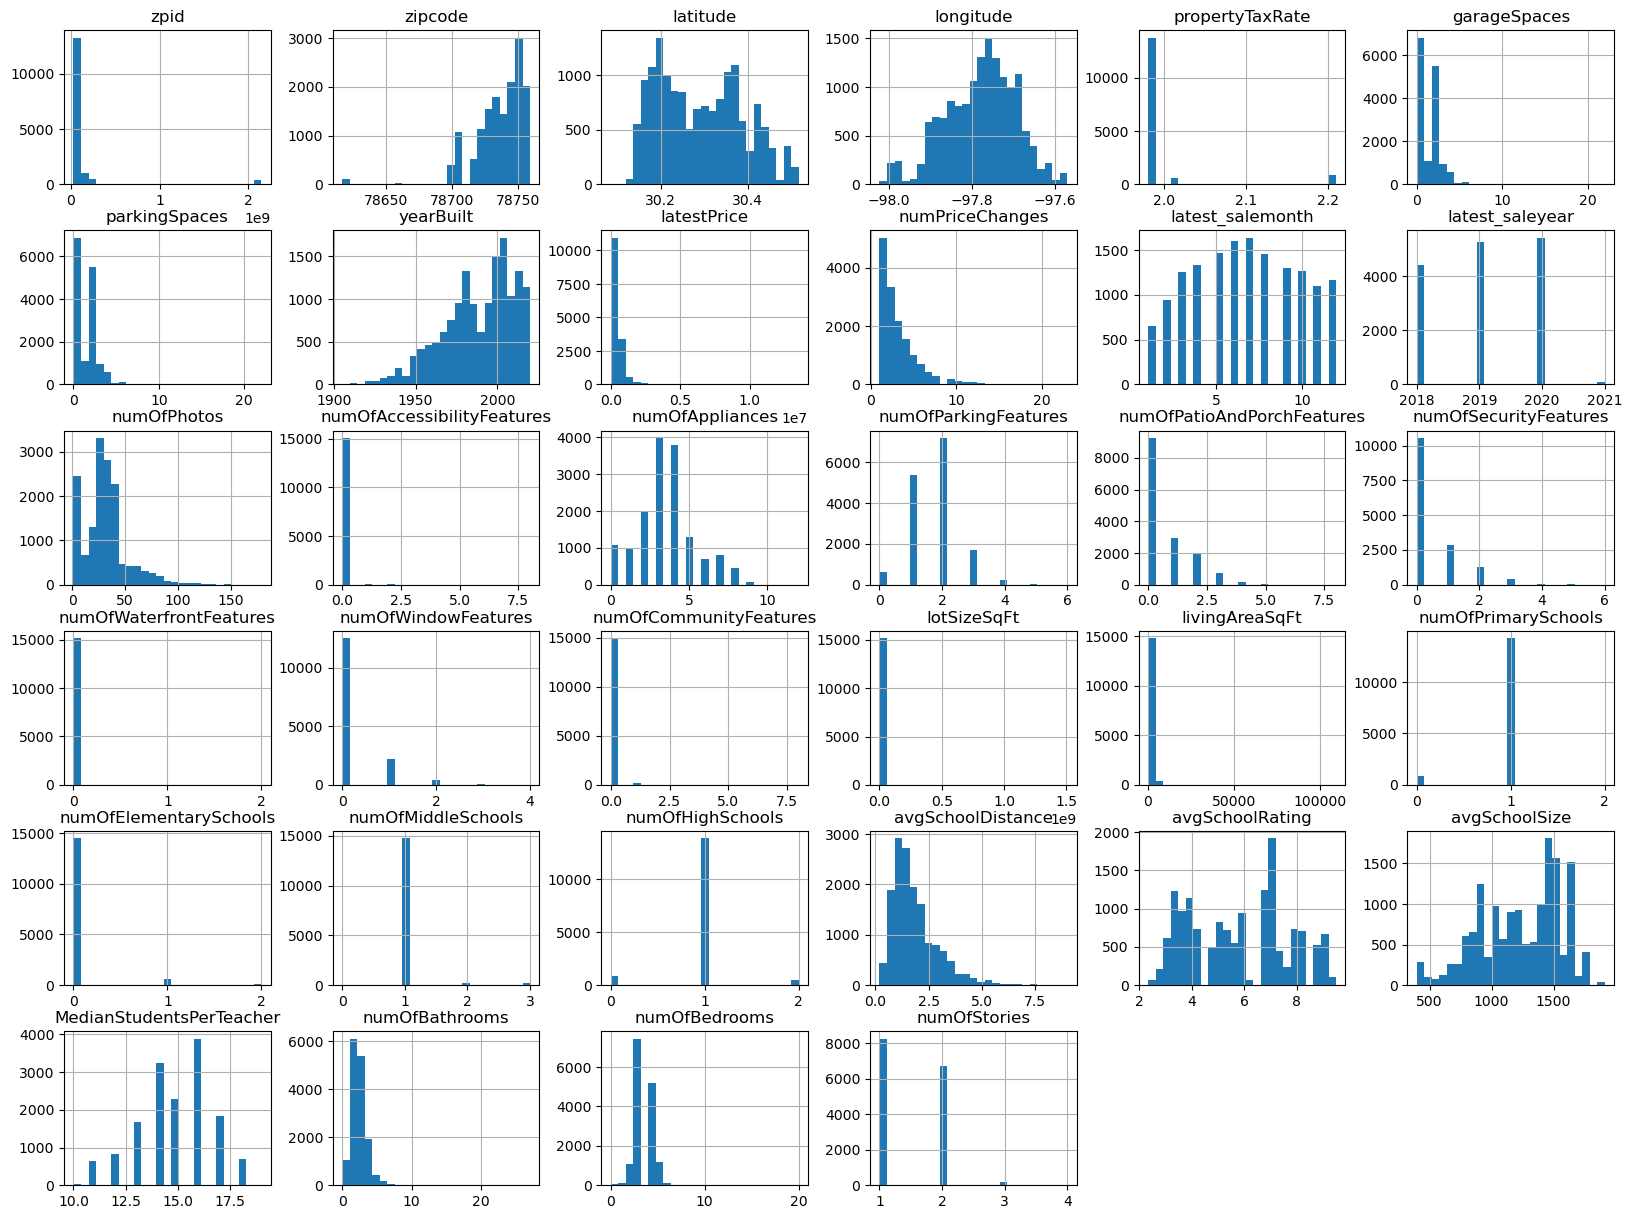

In [16]:
# Histogram
df.hist(bins=25, figsize=(20,15))
plt.show()

In [17]:
# Train test split
def split_train_test(data, test_ratio):
    """
    Creates the training and test set by
    splitting the given data set according
    to a predefined ratio.
    """
    np.random.seed(25)
    ind = np.random.permutation(len(data)) 
    test_size = int(len(data) * test_ratio) 
    test_ind = ind[:test_size] 
    train_ind = ind[test_size:] 
    return data.iloc[train_ind], data.iloc[test_ind]

train_df, test_df = split_train_test(df, 0.2) 
print(f"Train data set has {len(train_df)} rows, and test data set has {len(test_df)} rows.")

Train data set has 12137 rows, and test data set has 3034 rows.


In [18]:
# Benchmarking data set split times
def custom_split():
    train_df, test_df = split_train_test(df, 0.2)
    return train_df, test_df

def sklearn_split():
    train_df, test_df = train_test_split(df, test_size=0.2, shuffle=True, random_state=25)
    return train_df, test_df

custom_time = timeit.timeit(custom_split, number=100)
sklearn_time = timeit.timeit(sklearn_split, number=100)

print(f"Custom split time (100 runs): {custom_time:.4f} seconds")
print(f"Scikit-learn split time (100 runs): {sklearn_time:.4f} seconds")

Custom split time (100 runs): 0.3115 seconds
Scikit-learn split time (100 runs): 0.3156 seconds


#### * The custom split function is faster, but sklearn's train_test_split() supports a variety of inputs (NumPy arrays, Series, lists, sparse matrices)
#### For larger data sets, the split times seem to converge

Number of rows with NaN 'sqft': 0


<Axes: >

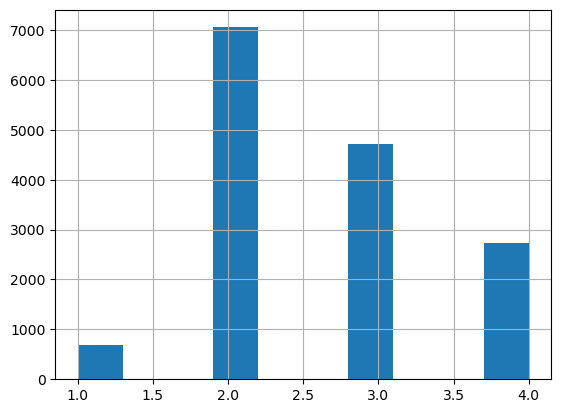

In [19]:
# Histogram of square footage categories

print(f"Number of rows with NaN 'sqft': {df['livingAreaSqFt'].isna().sum()}")
# df[df["livingAreaSqFt_cat"].isna()]             # displays those rows
df = df.dropna(subset=["livingAreaSqFt"])     # drop rows with NaN in 'livingAreaSqFt_cat'

df["livingAreaSqFt_cat"] = pd.cut(df["livingAreaSqFt"], 
                               bins=[0., 1000., 2000., 3000., np.inf], 
                               labels=[1, 2, 3, 4,])
df["livingAreaSqFt_cat"].hist()

In [20]:
# Check for rows with NaN for 'livingAreaSqFt_cat'

print(f"Number of rows with NaN 'livingAreaSqFt_cat': {df['livingAreaSqFt_cat'].isna().sum()}")
# df[df["livingAreaSqFt_cat"].isna()]             # displays those rows
df = df.dropna(subset=["livingAreaSqFt_cat"])     # drop rows with NaN in 'livingAreaSqFt_cat'

Number of rows with NaN 'livingAreaSqFt_cat': 0


In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=25)

for train_ind, test_ind in split.split(df, df["livingAreaSqFt_cat"]): 
    # .loc[] uses labeled indices; .iloc[] uses positional indices
    strat_train = df.iloc[train_ind] 
    strat_test = df.iloc[test_ind]

strat_train.head(n=3)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,livingAreaSqFt_cat
12288,29486907,austin,8101 Bounty Trl,78749,Beautifully updated one story on a quiet cul-d...,30.216976,-97.869698,1.98,2,False,...,1,1.533333,8.000000,1655,17,2.0,3,1,29486907_1956c95ea7c8657e11f84d5518dc3182-p_f.jpg,3
2552,80105578,austin,1504 Medio Calle,78733,"1504 Medio Calle, Austin, TX 78733 is a single...",30.337772,-97.863533,1.98,1,True,...,0,3.900000,8.000000,1373,14,1.0,2,2,80105578_0817d16a8242c8843fd2c2f9eb6b5a90-p_f.jpg,2
9876,29391320,austin,4605 Leslie Ave,78721,COMING SOON! This is a great starter home or p...,30.282074,-97.684486,1.98,0,False,...,1,2.066667,3.333333,635,13,2.0,3,1,29391320_78fdbc0a8e17734689c5b674eae84724-p_f.jpg,2


In [22]:
# Square ft category proportions
strat_test["livingAreaSqFt_cat"].value_counts() / len(strat_test)

livingAreaSqFt_cat
2    0.464909
3    0.310379
4    0.179572
1    0.045140
Name: count, dtype: float64

#### Category 2 (1000-2000 sq ft) takes up the majority of data at 46.49%

In [23]:
# Deleting "sqft_cat" data to restore data to original state
for set_ in (strat_train, strat_test): 
    set_.drop("livingAreaSqFt_cat", axis=1, inplace=True)

strat_train.head(n=3)

C:\Users\ohjin\AppData\Local\Temp\ipykernel_11356\1788786184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("livingAreaSqFt_cat", axis=1, inplace=True)
C:\Users\ohjin\AppData\Local\Temp\ipykernel_11356\1788786184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("livingAreaSqFt_cat", axis=1, inplace=True)


,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
12288,29486907,austin,8101 Bounty Trl,78749,Beautifully updated one story on a quiet cul-d...,30.216976,-97.869698,1.98,2,False,...,1,1,1.533333,8.000000,1655,17,2.0,3,1,29486907_1956c95ea7c8657e11f84d5518dc3182-p_f.jpg
2552,80105578,austin,1504 Medio Calle,78733,"1504 Medio Calle, Austin, TX 78733 is a single...",30.337772,-97.863533,1.98,1,True,...,3,0,3.900000,8.000000,1373,14,1.0,2,2,80105578_0817d16a8242c8843fd2c2f9eb6b5a90-p_f.jpg
9876,29391320,austin,4605 Leslie Ave,78721,COMING SOON! This is a great starter home or p...,30.282074,-97.684486,1.98,0,False,...,1,1,2.066667,3.333333,635,13,2.0,3,1,29391320_78fdbc0a8e17734689c5b674eae84724-p_f.jpg


#### Explore the training data (or its subset) to get a general understanding

<Axes: xlabel='longitude', ylabel='latitude'>

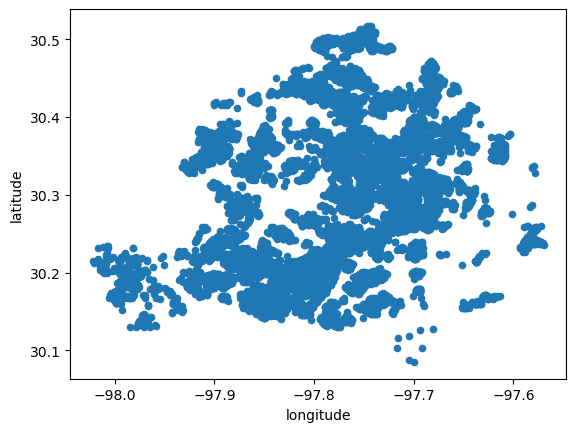

In [24]:
# In geographic coordinate systems, longitude is conventionally assigned to the x-axis, and latitude to the y-axis
df.plot(kind="scatter", x="longitude", y="latitude")

#### If data happens to include outliers, they can be excluded to produce a plot that better visualizes the general trend. There are two ways to appraoch this.

<Axes: xlabel='longitude', ylabel='latitude'>

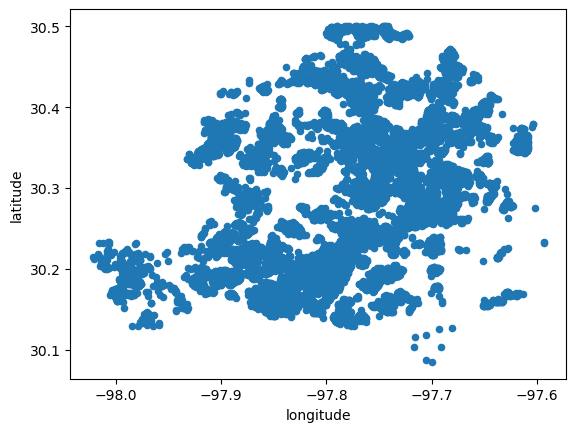

In [25]:
# Exclude outliers that reside above the 99th percentile of points (top 1% outliers)
df[
    (df['longitude'] < df['longitude'].quantile(0.99)) &
    (df['latitude'] < df['latitude'].quantile(0.99))
].plot(kind='scatter', x='longitude', y='latitude')

<Axes: title={'center': 'Scatterplot of latitude vs longitude (z<3)'}, xlabel='longitude', ylabel='latitude'>

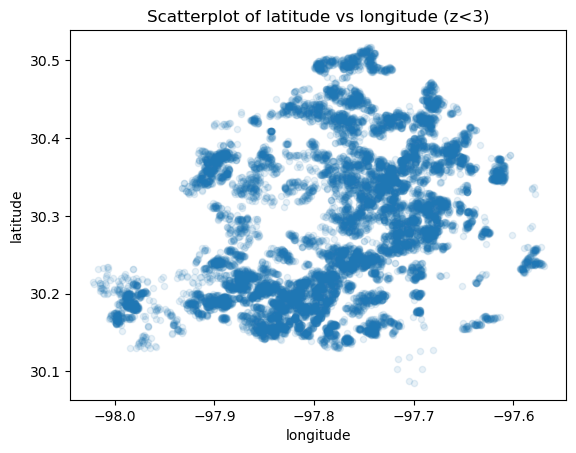

In [26]:
# Use z-score=3 to include points within 3 standard deviations (99.7%) from mean
# Choose 68-95-99.7 as needed
def scatter_without_outliers(df, x_col, y_col, z_thresh=3):
    """
    Plots a scatterplot without points whose z-score is above z_thresh in either axis
    """
    # Compute z-scores
    z_x = np.abs((df[x_col] - df[x_col].mean()) / df[x_col].std())
    z_y = np.abs((df[y_col] - df[y_col].mean()) / df[y_col].std())

    # Keep only points within z_thresh
    df_no_outliers = df[(z_x < z_thresh) & (z_y < z_thresh)]
    
    return df_no_outliers.plot(kind='scatter', x=x_col, y=y_col, alpha=0.1,
                               title=f"Scatterplot of latitude vs longitude (z<{z_thresh})")

scatter_without_outliers(df, 'longitude', 'latitude', z_thresh=3)

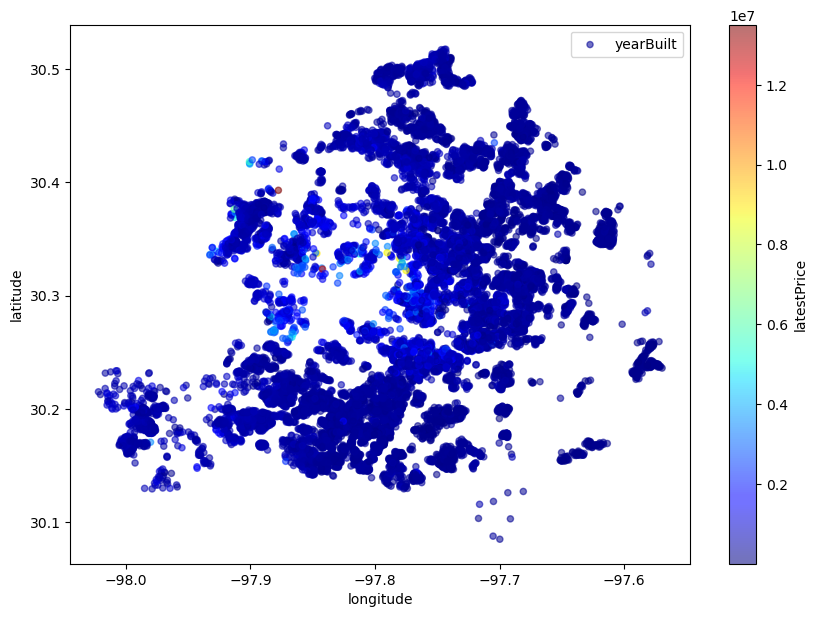

In [27]:
# Including a 3rd & 4th dimensions of year_built & baths
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.55, 
        s=df["yearBuilt"]/100, label="yearBuilt", figsize=(10,7), 
        c="latestPrice", cmap=plt.get_cmap("jet"), colorbar=True, 
        ) 
plt.legend()

#### We can see the latest prices of houses across the geographical location of Austin represented as varying colors. A higher density of warmer-color data points around the void in the center reflects the high housing prices around the lakes and parks - i.e., West Lake Hills, Rollingwood, Barton Creek, and the Metropolitan Parks - to the close western vicinity of UT Austin. This plot also displays the year in which these houses were built, where older houses are drawn as smaller bubbles. Almost all of the warmer-color data points have small bubbles, meaning that the newer houses are also more expensive.

In [28]:
# Remove all textual data before creating correlation matrix
corr_columns = [col for col in df.columns if col not in ['city', 'streetAddress', 'description', 'homeType', 'latest_saledate', 'latestPriceSource', 'homeImage']]
corr_matrix = df.loc[:, corr_columns].corr()

In [29]:
# Check correlation ranking between lastest price and other factors
corr_matrix["latestPrice"].sort_values(ascending=False)

latestPrice                   1.000000
numOfBathrooms                0.504738
livingAreaSqFt                0.467034
livingAreaSqFt_cat            0.432179
numOfBedrooms                 0.299839
avgSchoolRating               0.293101
numOfStories                  0.200555
MedianStudentsPerTeacher      0.198208
hasSpa                        0.173084
garageSpaces                  0.157443
parkingSpaces                 0.156811
numOfElementarySchools        0.155988
numOfPhotos                   0.154355
hasView                       0.133969
numOfMiddleSchools            0.127838
numOfWaterfrontFeatures       0.123979
numOfParkingFeatures          0.098384
avgSchoolDistance             0.094156
numOfPatioAndPorchFeatures    0.087936
avgSchoolSize                 0.085167
hasGarage                     0.074161
latitude                      0.071547
latest_saleyear               0.059942
yearBuilt                     0.059692
numOfSecurityFeatures         0.058349
numOfWindowFeatures      

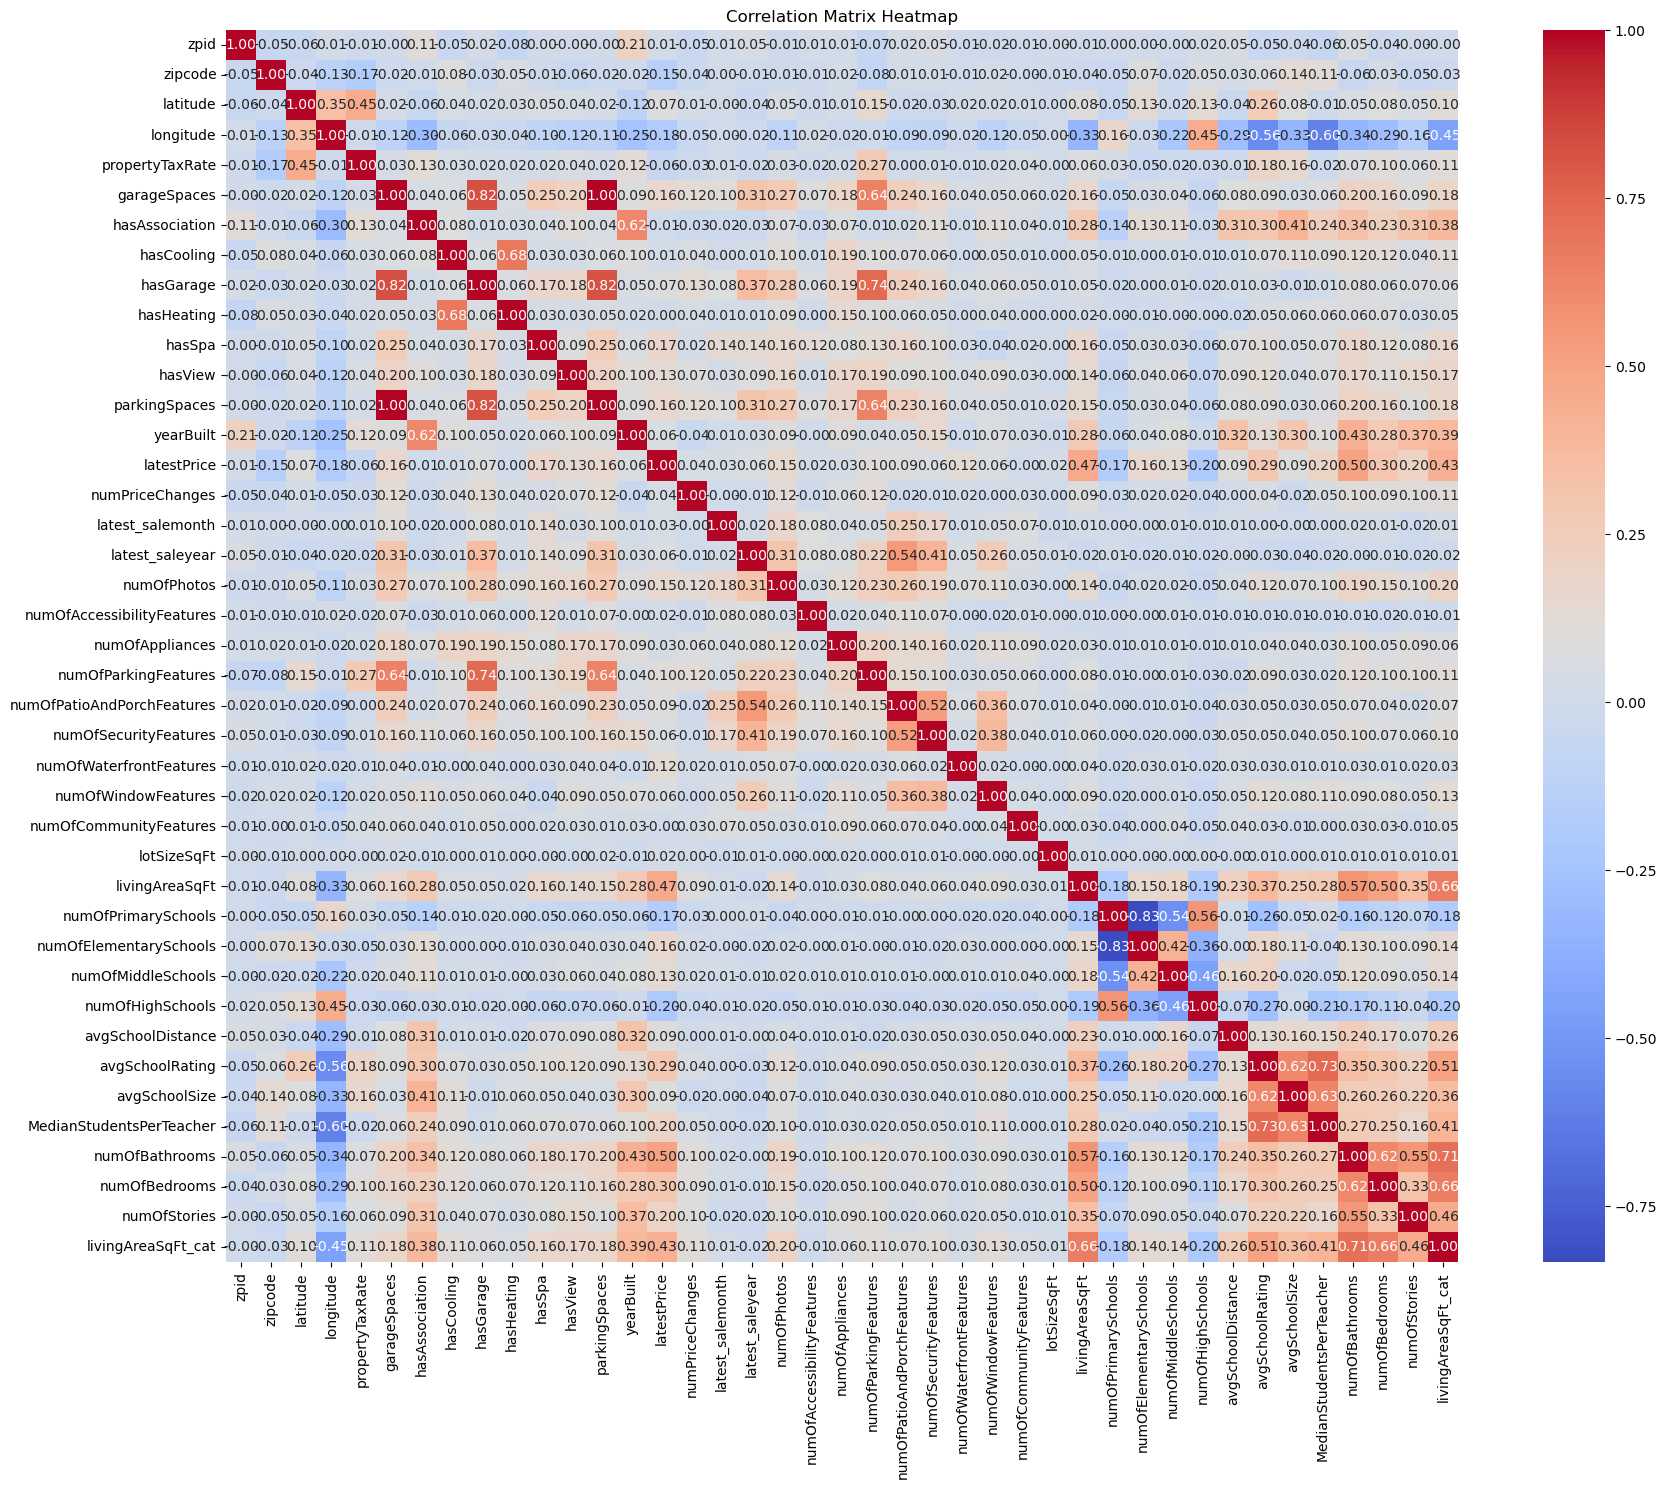

In [30]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(22, 16))
sns.heatmap(
    corr_matrix,
    annot=True,          # show correlation values
    fmt=".2f",           # format decimal places
    cmap="coolwarm",     # color scheme
    cbar=True,
    square=True
)
plt.title("Correlation Matrix Heatmap", fontsize=12)
plt.show()


#### A proper visualization of the correlation matrix is created using the heat map. Strong correlation between 'parkingSpaces' and 'garageSpaces' affirms the intuitive relationship one may suspect between those two features. There is also high correlation between 'MedianStudentsPerTeacher' and 'avgSchoolRating', implying that the number of students-to-teacher ratio impacts the quality of education, and thus the average school rating. numOfPrimarySchools and numOfElementarySchools are also highly correlated, suggesting that these schools are typically built together or within close proximity to each other.

array([[<Axes: xlabel='latestPrice', ylabel='latestPrice'>,
        <Axes: xlabel='avgSchoolRating', ylabel='latestPrice'>,
        <Axes: xlabel='livingAreaSqFt', ylabel='latestPrice'>,
        <Axes: xlabel='yearBuilt', ylabel='latestPrice'>],
       [<Axes: xlabel='latestPrice', ylabel='avgSchoolRating'>,
        <Axes: xlabel='avgSchoolRating', ylabel='avgSchoolRating'>,
        <Axes: xlabel='livingAreaSqFt', ylabel='avgSchoolRating'>,
        <Axes: xlabel='yearBuilt', ylabel='avgSchoolRating'>],
       [<Axes: xlabel='latestPrice', ylabel='livingAreaSqFt'>,
        <Axes: xlabel='avgSchoolRating', ylabel='livingAreaSqFt'>,
        <Axes: xlabel='livingAreaSqFt', ylabel='livingAreaSqFt'>,
        <Axes: xlabel='yearBuilt', ylabel='livingAreaSqFt'>],
       [<Axes: xlabel='latestPrice', ylabel='yearBuilt'>,
        <Axes: xlabel='avgSchoolRating', ylabel='yearBuilt'>,
        <Axes: xlabel='livingAreaSqFt', ylabel='yearBuilt'>,
        <Axes: xlabel='yearBuilt', ylabel='yearBuilt'

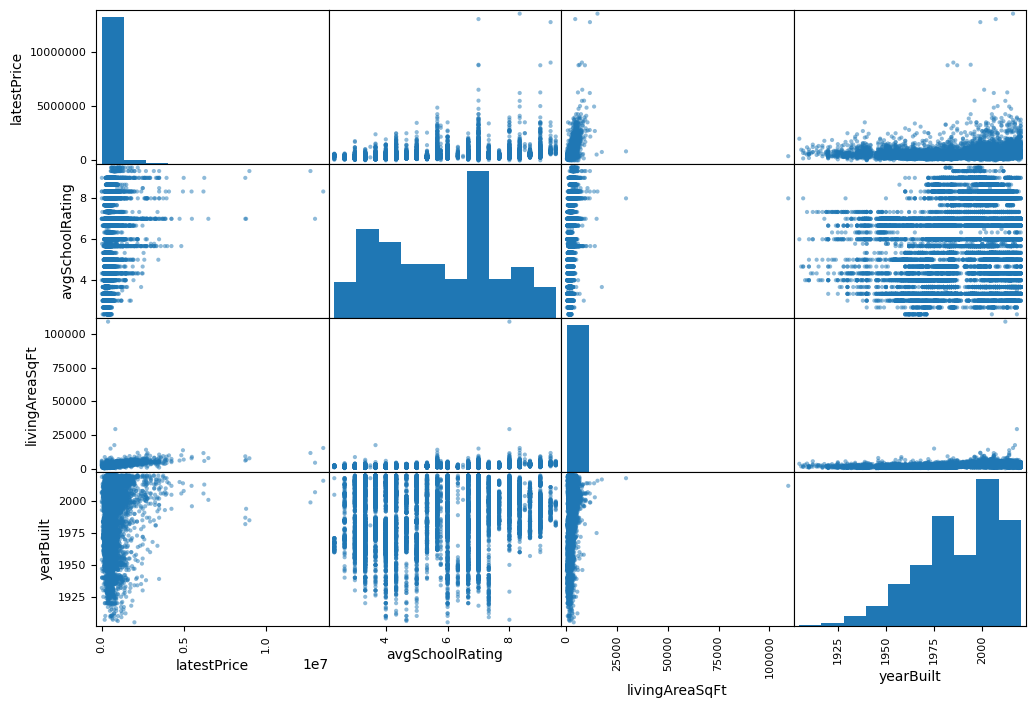

In [31]:
from pandas.plotting import scatter_matrix 
attributes = ["latestPrice", "avgSchoolRating", "livingAreaSqFt", "yearBuilt"] 
scatter_matrix(df[attributes], figsize=(12, 8))

#### Zooming into some of the plots...

<Axes: xlabel='yearBuilt', ylabel='latestPrice'>

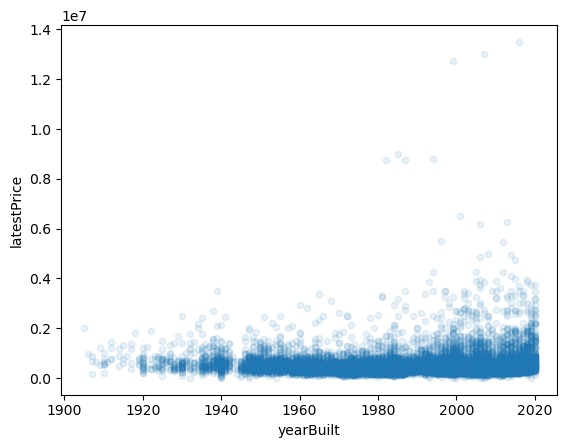

In [32]:
df.plot(kind="scatter", x="yearBuilt", y="latestPrice", alpha=0.1)

#### Some positive correlation can be observed between the latestPrice and yearBuilt variables, implying that newer housing is valued at a higher in the market. This may be due to ambient effects of inflation gradually increasing the housing prices over time, but can also be attributed to the fact that newer houses are built at a better quality and integrity than older structures for profitability.

<Axes: xlabel='livingAreaSqFt', ylabel='latestPrice'>

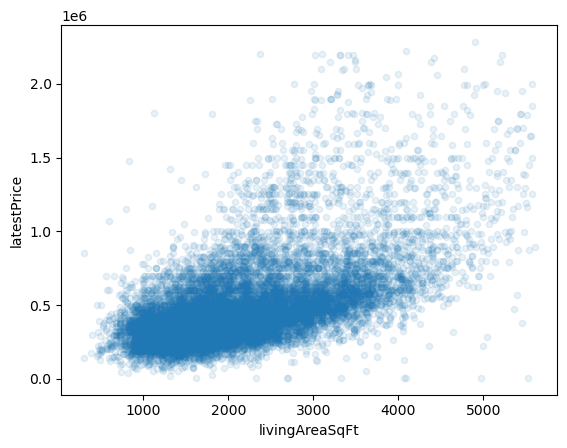

In [33]:
df[
    (df['livingAreaSqFt'] < df['livingAreaSqFt'].quantile(0.99)) &
    (df['latestPrice'] < df['latestPrice'].quantile(0.99))
].plot(kind="scatter", x="livingAreaSqFt", y="latestPrice", alpha=0.1)

#### A stronger positive correlation can be observed between latestPrice and livingAreaSqFt, which implies that the total sq-ft area of the living space has a more direct impact on the housing price than the year that it was built. This would make sense since old houses with a large square footage will be priced higher, especially if the house was kept in a good condition to drive up the value due to its legacy or historic significance in the area.

### Feature scaling

#### To prevent one or few features from dominating the influence on the machine learning algorithm's predictions, all of the features need to be on a similar scale. This can be achieved by either min-max scaling (normalization) or standardization.
#### Min-max scaling is done by subtracting by the minimum value, then dividing by the range (max - min) to ensure that points lie between 0 and 1 as a representation of percentile placement in their range.

In [ ]:
df_num = df.select_dtypes(include=[np.number])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
df_num_min_max_scaled = min_max_scaler.fit_transform(df_num)

#### Standardization is done by subtracting the mean (so standardized values always have a zero mean) and dividing by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which can cause a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers.

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_num_std_scaled = std_scaler.fit_transform(df_num)

In [34]:
# References:
    # Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow
    # https://www.kaggle.com/code/threnjen/austin-housing-eda-nlp-models-visualizations